In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix, recall_score, auc, precision_score, roc_auc_score, f1_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from transformers import  RobertaTokenizer, RobertaConfig, RobertaModel, AutoTokenizer, AutoModel

In [3]:
import torch

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = RobertaTokenizer.from_pretrained("microsoft/codebert-base")
model = RobertaModel.from_pretrained("microsoft/codebert-base")
model.to(device)

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0): RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Drop

In [5]:
df = pd.read_excel('projectASE_dataset.xlsx')

In [7]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

In [8]:
df.head()

,CWE-ID,code,label
0,CWE-129,public void goodG2BSink(LinkedList<Integer> da...,good
1,CWE-113,"public void bad(HttpServletRequest request, Ht...",bad
2,CWE-369,private void badSink(float data ) throws Throw...,bad
3,CWE-190,public void goodB2GSink(long data ) throws Thr...,good
4,CWE-129,public void goodB2GSink(CWE129_Improper_Valida...,good


In [9]:
df['code_tokens'] = df.apply(lambda row: tokenizer.tokenize(row['code']), axis=1)

In [10]:
df['tokens_ids'] = df.apply(lambda row: tokenizer.convert_tokens_to_ids(row["code_tokens"]), axis=1)

In [13]:
len(df)

14923

In [12]:
embeddings_list1 = []

In [33]:
# i = 13500
# while i < 14924:
#     embeddings_list1.append(model(torch.tensor(df.loc[i,"tokens_ids"])[None,:])[1].tolist())
#     i += 1

In [25]:
len(embeddings_list1)

14923

In [28]:
df

,CWE-ID,code,label,code_tokens,tokens_ids
0,CWE-129,public void goodG2BSink(LinkedList<Integer> da...,1,"[public, Ġvoid, Ġgood, G, 2, BS, ink, (, Link,...","[15110, 13842, 205, 534, 176, 3297, 4291, 1640..."
1,CWE-113,"public void bad(HttpServletRequest request, Ht...",0,"[public, Ġvoid, Ġbad, (, Http, Serv, let, Requ...","[15110, 13842, 1099, 1640, 49549, 44175, 2716,..."
2,CWE-369,private void badSink(float data ) throws Throw...,0,"[private, Ġvoid, Ġbad, S, ink, (, float, Ġdata...","[22891, 13842, 1099, 104, 4291, 1640, 46349, 4..."
3,CWE-190,public void goodB2GSink(long data ) throws Thr...,1,"[public, Ġvoid, Ġgood, B, 2, GS, ink, (, long,...","[15110, 13842, 205, 387, 176, 10729, 4291, 164..."
4,CWE-129,public void goodB2GSink(CWE129_Improper_Valida...,1,"[public, Ġvoid, Ġgood, B, 2, GS, ink, (, C, WE...","[15110, 13842, 205, 387, 176, 10729, 4291, 164..."
...,...,...,...,...,...
14918,CWE-259,public void badSink(LinkedList<String> dataLin...,0,"[public, Ġvoid, Ġbad, S, ink, (, Link, ed, Lis...","[15110, 13842, 1099, 104, 4291, 1640, 17860, 1..."
14919,CWE-190,public void badSink(int data ) throws Throwabl...,0,"[public, Ġvoid, Ġbad, S, ink, (, int, Ġdata, Ġ...","[15110, 13842, 1099, 104, 4291, 1640, 2544, 41..."
14920,CWE-134,public void badSink(String data ) throws Throw...,0,"[public, Ġvoid, Ġbad, S, ink, (, String, Ġdata...","[15110, 13842, 1099, 104, 4291, 1640, 34222, 4..."
14921,CWE-129,"public void bad(HttpServletRequest request, Ht...",0,"[public, Ġvoid, Ġbad, (, Http, Serv, let, Requ...","[15110, 13842, 1099, 1640, 49549, 44175, 2716,..."


In [29]:
final_cwe = df.copy(deep=True)

In [30]:
final_cwe['CWE-ID'] = pd.factorize(final_cwe['CWE-ID'])[0]
final_cwe = final_cwe.rename(columns={'CWE-ID': 'CWE_Numerical'})

In [31]:
extracted_col = final_cwe["CWE_Numerical"]
df = df.join(extracted_col)

In [34]:
df['embeddings'] = embeddings_list1

In [36]:
df['embeddings'] = df.apply(lambda row: row["embeddings"][0], axis=1)

In [37]:
df.head()

,CWE-ID,code,label,code_tokens,tokens_ids,CWE_Numerical,embeddings
0,CWE-129,public void goodG2BSink(LinkedList<Integer> da...,1,"[public, Ġvoid, Ġgood, G, 2, BS, ink, (, Link,...","[15110, 13842, 205, 534, 176, 3297, 4291, 1640...",0,"[0.5230033993721008, -0.5450685024261475, -0.6..."
1,CWE-113,"public void bad(HttpServletRequest request, Ht...",0,"[public, Ġvoid, Ġbad, (, Http, Serv, let, Requ...","[15110, 13842, 1099, 1640, 49549, 44175, 2716,...",1,"[0.49637043476104736, -0.550355076789856, -0.6..."
2,CWE-369,private void badSink(float data ) throws Throw...,0,"[private, Ġvoid, Ġbad, S, ink, (, float, Ġdata...","[22891, 13842, 1099, 104, 4291, 1640, 46349, 4...",2,"[0.49335911870002747, -0.5077936053276062, -0...."
3,CWE-190,public void goodB2GSink(long data ) throws Thr...,1,"[public, Ġvoid, Ġgood, B, 2, GS, ink, (, long,...","[15110, 13842, 205, 387, 176, 10729, 4291, 164...",3,"[0.5210403800010681, -0.45288988947868347, -0...."
4,CWE-129,public void goodB2GSink(CWE129_Improper_Valida...,1,"[public, Ġvoid, Ġgood, B, 2, GS, ink, (, C, WE...","[15110, 13842, 205, 387, 176, 10729, 4291, 164...",0,"[0.5231145024299622, -0.5267179012298584, -0.6..."


# Predicting CWE Categories

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df.embeddings.tolist(),df.CWE_Numerical, test_size=0.2, random_state=42)

In [39]:
def check_performance(classifier, X_train, y_train, X_test, results, idx):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:,1]
    # Metrics
    results.iloc[0, idx] = accuracy_score(y_test, y_pred)
    results.iloc[1, idx] = precision_score(y_test, y_pred,average='macro')
    results.iloc[2, idx] = recall_score(y_test, y_pred,average='macro')
    
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision Score: ",precision_score(y_test, y_pred,average='macro'))
    print("Recall Score: ",recall_score(y_test, y_pred,average='macro'))

In [40]:
results = pd.DataFrame(columns = ['DT','RF','NB', 'KNN'], index = range(3))
# DT --> Decision Tree
# RF --> Random Forest
# NB --> Naive Bayes 
# KNN --> K Nearest Neighbors

In [41]:
check_performance(DecisionTreeClassifier(), X_train, y_train, X_test, results, 0)

Accuracy:  0.7279731993299833
Precision Score:  0.4879246980521366
Recall Score:  0.4578447146491558


C:\Users\Z1907280\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z1907280\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
check_performance(RandomForestClassifier(), X_train, y_train, X_test, results, 1)

Accuracy:  0.8629815745393635
Precision Score:  0.882399938916702
Recall Score:  0.7729528864329822


C:\Users\Z1907280\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z1907280\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
check_performance(GaussianNB(), X_train, y_train, X_test, results, 2)

Accuracy:  0.4130653266331658
Precision Score:  0.5689068403878289
Recall Score:  0.589880814499387


C:\Users\Z1907280\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z1907280\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z1907280\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z1907280\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefi

In [44]:
check_performance(KNeighborsClassifier(), X_train, y_train, X_test, results, 3)

Accuracy:  0.7842546063651591
Precision Score:  0.8525168992032196
Recall Score:  0.7653559691772731


In [45]:
results

,DT,RF,NB,KNN
0,0.727973,0.862982,0.413065,0.784255
1,0.487925,0.8824,0.568907,0.852517
2,0.457845,0.772953,0.589881,0.765356


In [46]:
results.to_excel('CodeBERT_cwe_outputs.xlsx')

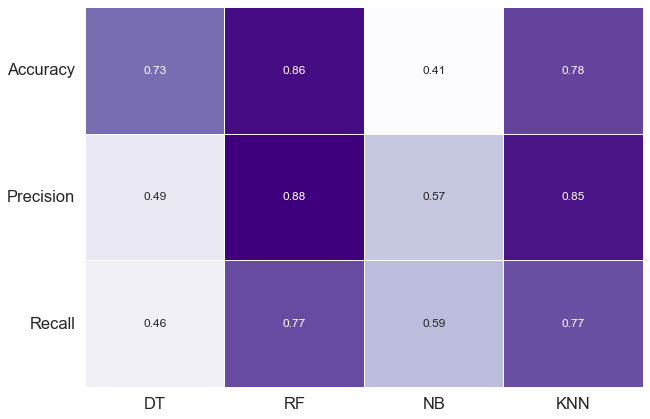

In [68]:
plt.figure(figsize = (10, 7))
sns.heatmap(results[results.columns.to_list()].astype(float), cmap = 'Purples', annot = True, linewidths = 1, cbar = False, annot_kws = {'fontsize': 12},
           yticklabels = ['Accuracy', 'Precision', 'Recall'])
sns.set(font_scale = 1.5)
plt.yticks(rotation = 0)
plt.show()

# Predicting Good and Bad Code

In [56]:
def check_performance_l(classifier_l, X_train_l, y_train_l, X_test_l, results_badGood, idx_l):
    classifier_l.fit(X_train_l, y_train_l)
    y_pred_l = classifier_l.predict(X_test_l)
    y_prob_l = classifier_l.predict_proba(X_test_l)[:,1]
    # Metrics
    results_badGood.iloc[0, idx_l] = accuracy_score(y_test_l, y_pred_l)
    results_badGood.iloc[1, idx_l] = round(precision_score(y_test_l, y_pred_l), 2)
    results_badGood.iloc[2, idx_l] = round(recall_score(y_test_l, y_pred_l), 2)
    results_badGood.iloc[3, idx_l] = round(roc_auc_score(y_test_l, y_prob_l), 3)

    print(classification_report(y_test_l, y_pred_l))
    print("Accuracy: ", accuracy_score(y_test_l, y_pred_l))
    print("Precision Score: ",precision_score(y_test_l, y_pred_l))
    print("Recall Score: ",recall_score(y_test_l, y_pred_l))
    print(f'ROC AUC score: {round(roc_auc_score(y_test_l, y_prob_l), 3)}')
    print('')
    print('-----------------------------------------------------')

    # Roc curve
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_l, y_prob_l)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    sns.set(style = 'white')
    plt.figure(figsize = (8, 8))
    plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [53]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(df.embeddings.tolist(),df.label, test_size=0.2, random_state=42)

In [60]:
results_badGood = pd.DataFrame(columns = ['NV','DT','KNN','RF'], index = range(4))
# DT --> Decision Tree
# RF --> Random Forest
# NB --> Naive Bayes 
# KNN --> K Nearest Neighbors

              precision    recall  f1-score   support

           0       0.55      0.75      0.63       923
           1       0.87      0.72      0.79      2062

    accuracy                           0.73      2985
   macro avg       0.71      0.74      0.71      2985
weighted avg       0.77      0.73      0.74      2985

Accuracy:  0.7323283082077052
Precision Score:  0.8673647469458988
Recall Score:  0.7230843840931135
ROC AUC score: 0.79

-----------------------------------------------------


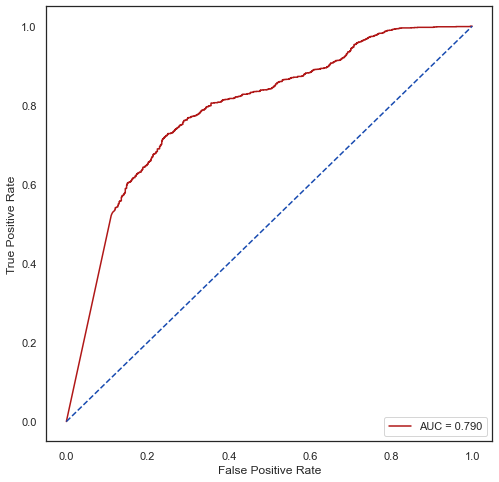

In [61]:
check_performance_l(GaussianNB(), X_train_l, y_train_l, X_test_l, results_badGood, 0)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       923
           1       0.95      0.96      0.96      2062

    accuracy                           0.94      2985
   macro avg       0.93      0.93      0.93      2985
weighted avg       0.94      0.94      0.94      2985

Accuracy:  0.9407035175879397
Precision Score:  0.9507412721186035
Recall Score:  0.9641125121241513
ROC AUC score: 0.926

-----------------------------------------------------


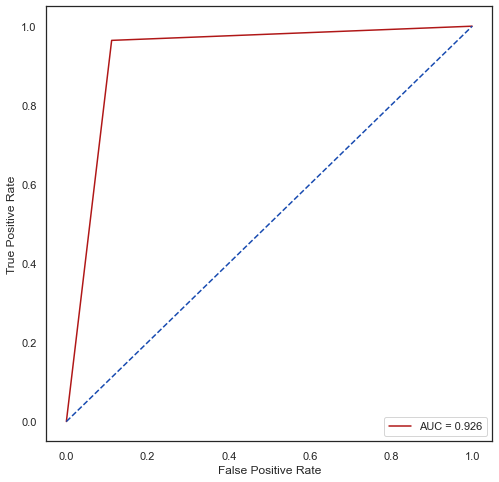

In [62]:
check_performance_l(DecisionTreeClassifier(), X_train_l, y_train_l, X_test_l, results_badGood, 1)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       923
           1       0.95      0.96      0.95      2062

    accuracy                           0.93      2985
   macro avg       0.93      0.92      0.92      2985
weighted avg       0.93      0.93      0.93      2985

Accuracy:  0.9343383584589615
Precision Score:  0.9451335877862596
Recall Score:  0.960717749757517
ROC AUC score: 0.977

-----------------------------------------------------


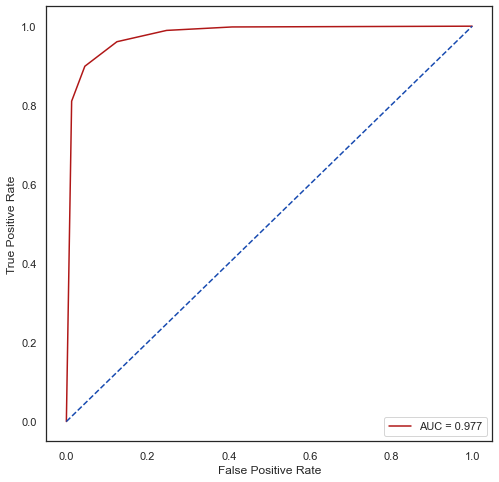

In [63]:
check_performance_l(KNeighborsClassifier(), X_train_l, y_train_l, X_test_l, results_badGood, 2)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       923
           1       0.98      1.00      0.99      2062

    accuracy                           0.99      2985
   macro avg       0.99      0.98      0.98      2985
weighted avg       0.99      0.99      0.99      2985

Accuracy:  0.985929648241206
Precision Score:  0.9837164750957854
Recall Score:  0.9961202715809894
ROC AUC score: 0.999

-----------------------------------------------------


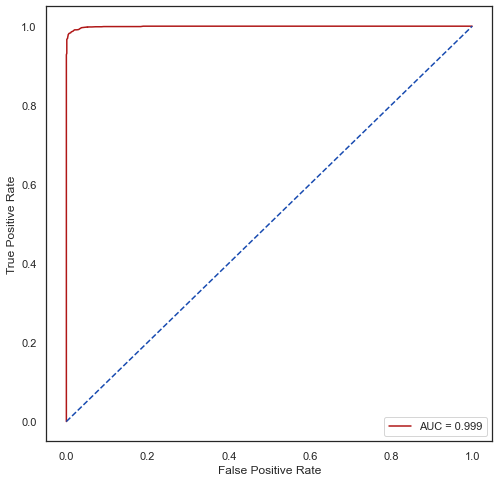

In [64]:
check_performance_l(RandomForestClassifier(), X_train_l, y_train_l, X_test_l, results_badGood, 3)

In [65]:
results_badGood.to_excel('CodeBERT_badgood_outputs.xlsx')

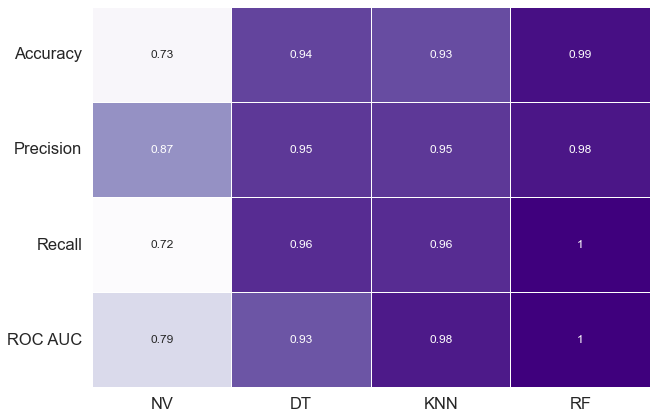

In [67]:
plt.figure(figsize = (10, 7))
sns.heatmap(results_badGood[results_badGood.columns.to_list()].astype(float), cmap = 'Purples', annot = True, linewidths = 1, cbar = False, annot_kws = {'fontsize': 12},
           yticklabels = ['Accuracy', 'Precision', 'Recall','ROC AUC'])
sns.set(font_scale = 1.5)
plt.yticks(rotation = 0)
plt.show()